# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_sparc4acs2_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:54.578000,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:55.698073,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:56.818146,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:57.938219,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:59.058291,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:46:53.001000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,8,L4,None,True
2352,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:48:55.395000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,9,L4,None,True
2353,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:50:57.799000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,10,L4,None,True
2354,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:53:00.405000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,11,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   82R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   82R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   82R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   82R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   82R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

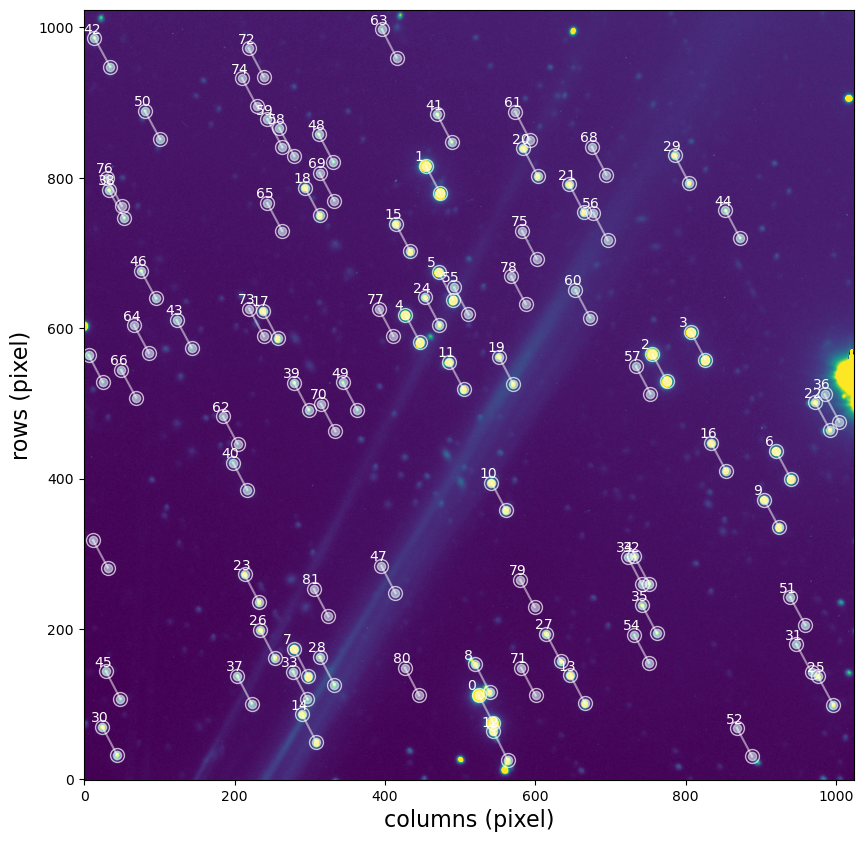

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553064,-38.759791,543.942088,75.098478,6.200744,6.200744,-11.456429,0.000555,-9.544817,0.000456,10,0
1,1,189.564741,-38.693915,473.584896,779.289066,6.041086,6.041086,-11.057092,0.000696,-9.583007,0.000469,10,0
2,2,189.527385,-38.716352,774.751963,529.516763,6.204742,6.204742,-10.921405,0.000760,-9.583156,0.000605,10,0
3,3,189.521326,-38.713466,826.194654,558.223304,6.159648,6.159648,-10.311313,0.001087,-9.586230,0.000461,10,0
4,4,189.567089,-38.712648,446.449813,581.228720,6.209708,6.209708,-10.035804,0.001410,-9.573139,0.000966,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,189.571366,-38.711998,411.220544,589.517548,5.917221,5.917221,-5.727682,0.048428,-9.570550,0.000657,10,0
78,78,189.550406,-38.707358,587.105317,632.270836,6.125030,6.125030,-5.726411,0.052045,-9.594298,0.000819,10,0
79,79,189.547130,-38.745174,599.093295,229.178439,6.152557,6.152557,-5.565152,0.051653,-9.549350,0.000403,10,0
80,80,189.565055,-38.756722,445.554585,111.647522,6.113355,6.113355,-5.533135,0.095618,-9.551321,0.002003,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

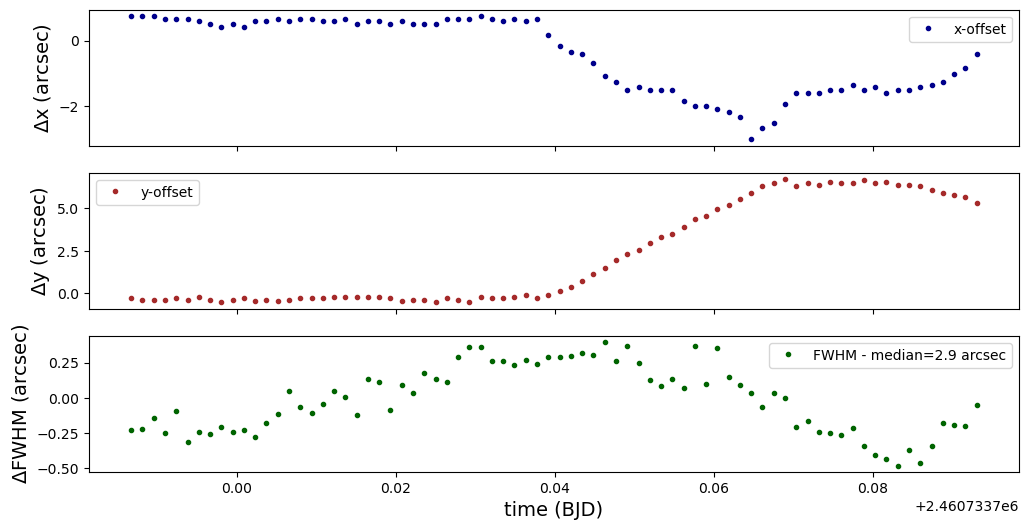

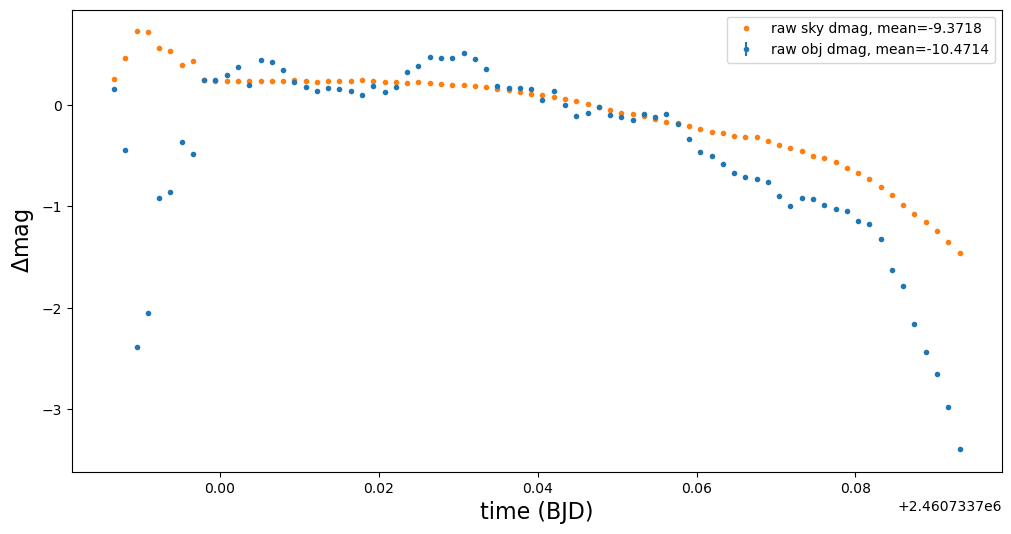

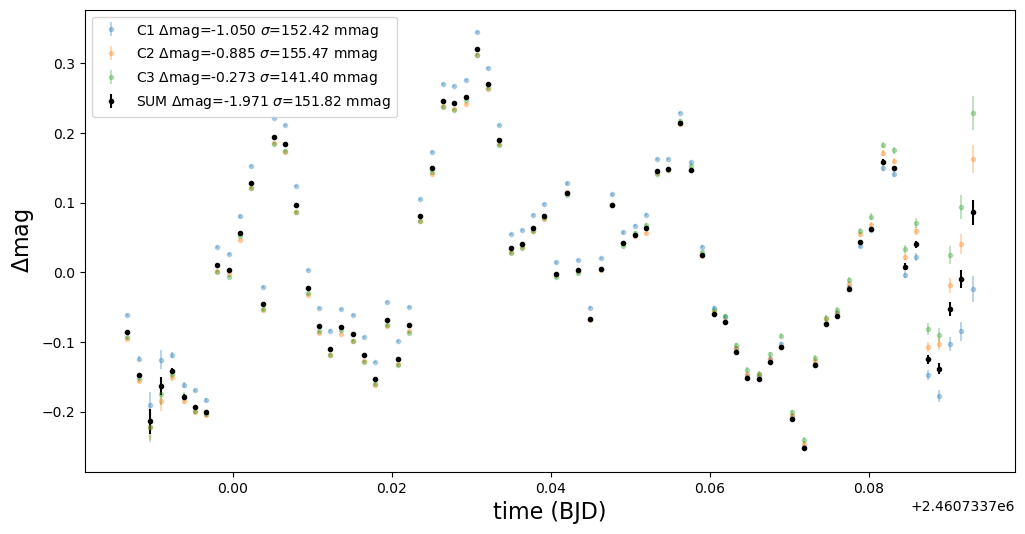

       TIME               x         ...       diffmagsum     
------------------ ---------------- ... ---------------------
 2460733.686716327 436.833325826679 ...  -0.08589911280778217
 2460733.688136267 436.833325826679 ...  -0.14678249384580333
2460733.6895530582 436.833325826679 ...  -0.21394405137761652
 2460733.690973102 436.583325826679 ...  -0.16334309955474957
 2460733.692391283 436.583325826679 ...  -0.14175698300715034
 2460733.693809047 436.583325826679 ...  -0.17904584147014546
 2460733.695225549 436.333325826679 ...   -0.1927416049818227
               ...              ... ...                   ...
2460733.7845802284 430.083325826679 ...  0.008037768897558806
 2460733.785996961 430.333325826679 ...   0.04008830383303419
2460733.7874161475 430.583325826679 ...  -0.12479639880571547
2460733.7888328335 430.833325826679 ...  -0.13808597571631331
2460733.7902496355 431.583325826679 ...  -0.05231478479363538
 2460733.791668776 432.083325826679 ... -0.009839238443330345
2460733.

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     483   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    690   82R x 339C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0073', 'EFE0073', 'FO0074', 'EFO0074', 'FE0074', 'EFE0074', 'FO0075',
       'EFO0075', 'FE0075', 'EFE0075'],
      dtype='object', length=339)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:31:33,929 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:31:33,929 | INFO | Normalization disabled.


2025-09-18 00:31:33,937 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 00:31:33,937 | INFO | Source index: i=4 


2025-09-18 00:31:33,938 root - INFO - Source RA=189.56708933149048 Dec=-38.71264773036204 mag=-15.0592+-0.0002  [pipeline_lib]


2025-09-18 00:31:33,938 | INFO | Source RA=189.56708933149048 Dec=-38.71264773036204 mag=-15.0592+-0.0002


2025-09-18 00:31:33,940 root - INFO - Best aperture radius: 8.0 pixels  [pipeline_lib]


2025-09-18 00:31:33,940 | INFO | Best aperture radius: 8.0 pixels


2025-09-18 00:31:33,941 root - INFO - Polarization in Q: -0.0081+-0.0008  [pipeline_lib]


2025-09-18 00:31:33,941 | INFO | Polarization in Q: -0.0081+-0.0008


2025-09-18 00:31:33,942 root - INFO - Polarization in U: 0.000+-0.001  [pipeline_lib]


2025-09-18 00:31:33,942 | INFO | Polarization in U: 0.000+-0.001


2025-09-18 00:31:33,943 root - INFO - Polarization in V: 0.0005+-0.0007  [pipeline_lib]


2025-09-18 00:31:33,943 | INFO | Polarization in V: 0.0005+-0.0007


2025-09-18 00:31:33,944 root - INFO - Total linear polarization p: 0.0081+-0.0008  [pipeline_lib]


2025-09-18 00:31:33,944 | INFO | Total linear polarization p: 0.0081+-0.0008


2025-09-18 00:31:33,945 root - INFO - Angle of polarization theta: 90+-3 deg  [pipeline_lib]


2025-09-18 00:31:33,945 | INFO | Angle of polarization theta: 90+-3 deg


2025-09-18 00:31:33,946 root - INFO - Free constant k: 1.2304023947501244+-0.0  [pipeline_lib]


2025-09-18 00:31:33,946 | INFO | Free constant k: 1.2304023947501244+-0.0


2025-09-18 00:31:33,947 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 00:31:33,947 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 00:31:33,948 root - INFO - RMS of zi residuals: 0.005946175928132469  [pipeline_lib]


2025-09-18 00:31:33,948 | INFO | RMS of zi residuals: 0.005946175928132469


2025-09-18 00:31:33,949 root - INFO - Reduced chi-square (n=76.0, DOF=73.0): 7.87  [pipeline_lib]


2025-09-18 00:31:33,949 | INFO | Reduced chi-square (n=76.0, DOF=73.0): 7.87


2025-09-18 00:31:34,029 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:31:34,029 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:31:34,034 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:31:34,034 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:31:34,263 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:31:34,263 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:31:34,268 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:31:34,268 | INFO | Substituting symbol \perp from STIXGeneral


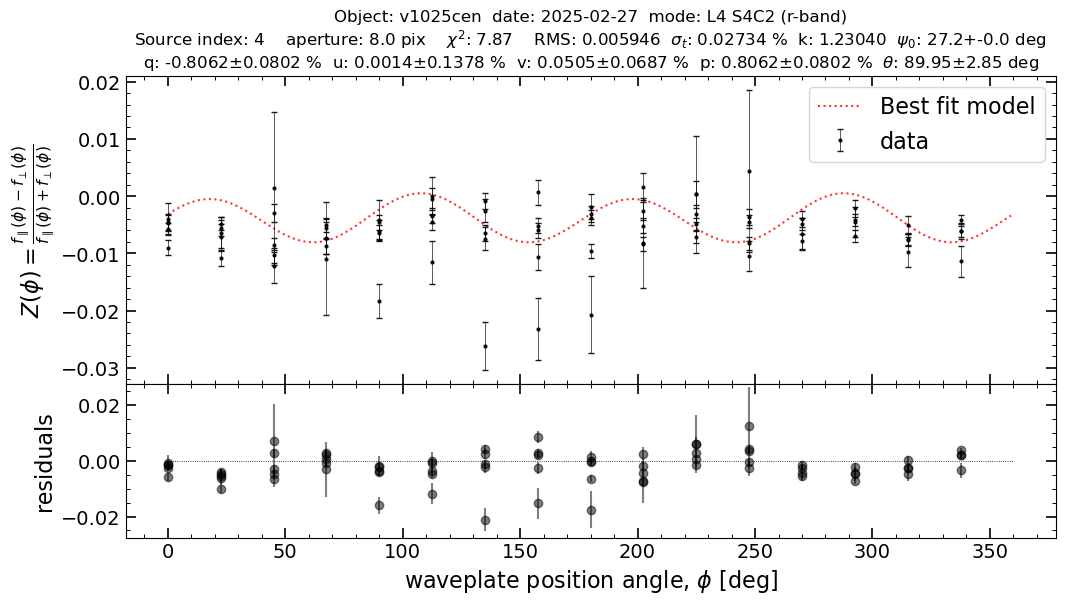

In [13]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [14]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs2/20250226_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 2
APERTURE_RADIUS : 8.0
NEXPS : 76
MAG : -15.0592+-0.0002
RA : 189.56708933149048
DEC : -38.71264773036204
FWHM : 5.98064004237129
X1 : 427.2168390543587
Y1 : 617.6860728441377
X2 : 446.44981259899936
Y2 : 581.2287199946535
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5]
ZI : [-0.009+-0.001, -0.007+-0.002, 0.00+-0.01, ..., -0.008+-0.008, 0.00+-0.01,


And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [15]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.81+-0.08 %  Angle of polarization: 90+-3 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [16]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [17]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

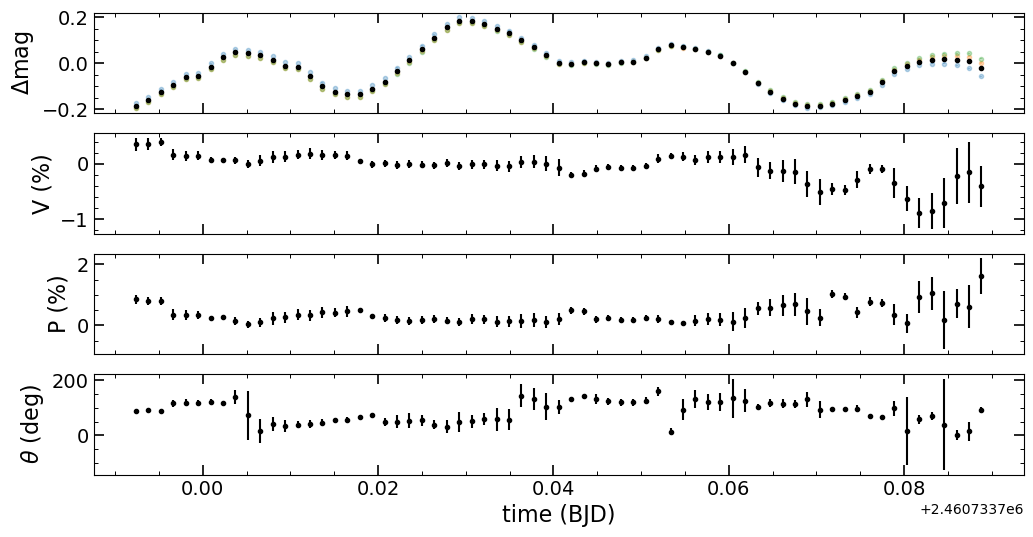

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.17302197582165135,0.0013140367176795228,-0.19494464795370092,0.001332970673105284,-0.1936045030332636,0.001498676321679057,2460733.6923734657,427.2168390543587,617.6860728441377,446.44981259899936,581.2287199946535,5.537107850826292,-12.158502197398429,0.0012354635036811805,-14.281775951798345,0.0010818612762945443,-0.18616487718419172,0.00851990337478757,0.0014214169885609675,87.77076465646547,4.771477337776414
-0.14667733660205684,0.001290887847774585,-0.16844226136857188,0.0013102749982713314,-0.1678254196278175,0.001478958061777266,2460733.693793157,427.2168390543587,617.4360728441377,446.44981259899936,580.9787199946535,5.538427306942205,-12.181713054964195,0.0012102841485284997,-14.278702694786478,0.0010845117770614291,-0.1598807626065586,0.008005575592927574,0.0013394835617792354,90.61853272835023,4.785318609786152
-0.11284624602769,0.0011424301275904884,-0.13393111328782403,0.0011607602820105857,-0.13516614287171969,0.0013160351860543634,2460733.6952097975,427.2168390543587,617.4360728441377,446.44981259899936,580.9787199946535,5.538427306942205,-12.318452715738202,0.0010664086170077561,-14.381606110277016,0.0009862948972633242,-0.12604451732308952,0.007864630476732871,0.0013396288470783084,88.83146724164831,4.871606509649489
-0.08048043520453874,0.0009235018897219879,-0.10218136563509361,0.0009392255917890016,-0.10242961014915508,0.0010688409317796503,2460733.6966296565,426.9668390543587,617.4360728441377,446.19981259899936,580.9787199946535,5.509782461516819,-12.552856125101497,0.0008577498329344828,-14.583793761300957,0.000818667858378277,-0.09382875898373477,0.0035315544728023594,0.0017199577954375915,116.00350989592346,13.928935070476552
-0.04518450425075926,0.0007706344022834992,-0.06634287002062145,0.0007851066483467805,-0.06701246132753802,0.000896941306312066,2460733.6980482945,426.9668390543587,617.6860728441377,446.19981259899936,581.2287199946535,5.5058043993632495,-12.753763487827438,0.0007117578124706136,-14.749178755067526,0.0007035452987484865,-0.058306390024363,0.0034753382027159284,0.001538629795884664,118.0291856036717,12.662022973163372
-0.04160520926096112,0.0006995950462296773,-0.06306068537070608,0.0007130041679734602,-0.06394200242647763,0.0008137007101472371,2460733.6994657395,426.9668390543587,617.4360728441377,446.19981259899936,580.9787199946535,5.5058043993632495,-12.86073530950457,0.0006452093209476941,-14.852788441629247,0.0006411176291737696,-0.05494425490895338,0.0033837380074976313,0.0014122669929824705,118.08245242415742,11.93675039550973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.02309483443358573,0.0013652466223728634,-0.003605786080592921,0.0013939284070988494,0.001919701871825552,0.0015937144824458224,2460733.780311224,420.4668390543587,638.1860728441377,439.69981259899936,601.7287199946535,5.250548947688042,-11.6921293197341,0.0012698179764797713,-13.64075140847316,0.0012286364455776414,-0.011513211523334732,0.0006969343220052684,0.0030072239556504024,15.425721412854257,123.4070448476942
-0.006910862654020633,0.0014363840752385775,0.015631793342990363,0.0014680641359009696,0.022473614847729806,0.001689000835252142,2460733.781727991,420.4668390543587,637.9360728441377,439.69981259899936,601.4787199946535,5.249974776402653,-11.598567906350914,0.0013323637370241332,-13.528991886245436,0.001321194897427831,0.006684897321202143,0.009240271340199734,0.005189743405671014,57.5728458502225,16.063019789955938


In [18]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)